In [33]:
import torch
import pandas as pd
from matplotlib import pyplot as plt
import torch.nn as nn

In [43]:
x = torch.randn(1000, 1)*20
y = 3*x + torch.randn(1000, 1)*10
#optional written the data to disk
# data = torch.cat((x, y), dim=1)

In [35]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        super().__init__()
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = torch.nn.Linear(1, 1)
    
    def forward(self, x):
        x = self.layer(x)
        return x

In [40]:
input_data = CustomDataset(x, y)
train_loader = torch.utils.data.DataLoader(input_data, batch_size=100, shuffle=True)

In [41]:
model = LinearRegression()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
mse = torch.nn.MSELoss()

Epoch: 0, Loss: 83.9809799194336
Epoch: 1, Loss: 102.90611267089844
Epoch: 2, Loss: 124.49431610107422
Epoch: 3, Loss: 120.24299621582031
Epoch: 4, Loss: 90.05782318115234
Epoch: 5, Loss: 104.9025650024414
Epoch: 6, Loss: 115.402099609375
Epoch: 7, Loss: 95.73394775390625
Epoch: 8, Loss: 119.35352325439453
Epoch: 9, Loss: 100.08413696289062
Epoch: 10, Loss: 92.15937805175781
Epoch: 11, Loss: 101.91339111328125
Epoch: 12, Loss: 76.68955993652344
Epoch: 13, Loss: 88.67814636230469
Epoch: 14, Loss: 97.00345611572266
Epoch: 15, Loss: 114.57247924804688
Epoch: 16, Loss: 106.88880157470703
Epoch: 17, Loss: 97.52734375
Epoch: 18, Loss: 100.96595001220703
Epoch: 19, Loss: 82.92141723632812
Epoch: 20, Loss: 112.59211730957031
Epoch: 21, Loss: 96.91487121582031
Epoch: 22, Loss: 92.08114624023438
Epoch: 23, Loss: 80.76802062988281
Epoch: 24, Loss: 99.29635620117188
Epoch: 25, Loss: 108.872314453125
Epoch: 26, Loss: 107.0978775024414
Epoch: 27, Loss: 84.08236694335938
Epoch: 28, Loss: 109.24092102

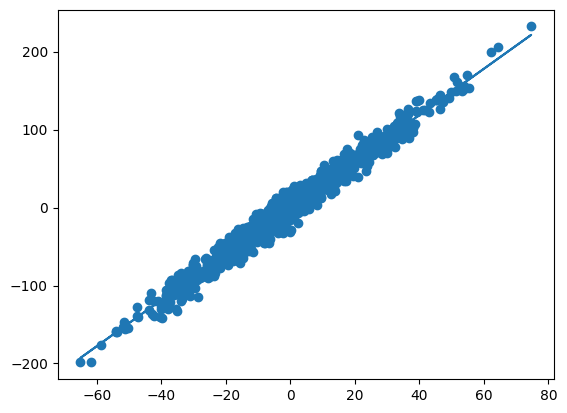

In [56]:
epochs = 100
for epoch in range(epochs):
    for x_train, y_train in train_loader:
        optimizer.zero_grad()
        pred = model(x_train) 
        loss = mse(pred, y_train)
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch}, Loss: {loss}")
with torch.no_grad():
    y_pred = model(x)
plt.figure()
plt.scatter(x, y)
plt.plot(x, y_pred)